In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
from decimal import Decimal
sys.path.append("/home/lvotapka/mmvt_seekr")
import mmvt_seekr as seekr
import numpy as np
#import numpy as np

In [2]:
bound_states = [0]
verbose=False
conv_stride = 100000

# Calculate kinetics with full data

In [3]:
model, max_steps = seekr.model.make_model(milestone_filename="/home/lvotapka/mmvt_seekr/mmvt_seekr/data/bcd_aspirin_tutorial/aspirin_expected_results/milestones.xml")
p_equil, N, R, T, T_tot, Q, n_conv, r_conv, k_cell= seekr.analyze.analyze_kinetics(model, bound_states, verbose=True,)
MFPT = T[0]
k_off = 1/MFPT


Now parsing milestones from site: site_0 in XML file.
parsing md transitions for:Anchor anchor_0
parsing transitions from file: /home/lvotapka/mmvt_seekr/mmvt_seekr/data/bcd_aspirin_tutorial/aspirin_expected_results/anchor_0/md/prod/vt_milestoning_1.out.results
parsing transitions from file: /home/lvotapka/mmvt_seekr/mmvt_seekr/data/bcd_aspirin_tutorial/aspirin_expected_results/anchor_0/md/prod/vt_milestoning_3.out.results
parsing transitions from file: /home/lvotapka/mmvt_seekr/mmvt_seekr/data/bcd_aspirin_tutorial/aspirin_expected_results/anchor_0/md/prod/vt_milestoning_4.out.results
parsing transitions from file: /home/lvotapka/mmvt_seekr/mmvt_seekr/data/bcd_aspirin_tutorial/aspirin_expected_results/anchor_0/md/prod/vt_milestoning_5.out.results
anchor 0 {1: 0, 2: 9999820, 3: 19809340, 4: 29572400, 5: 39326850}
39326850 0
parsing md transitions for:Anchor anchor_1
parsing transitions from file: /home/lvotapka/mmvt_seekr/mmvt_seekr/data/bcd_aspirin_tutorial/aspirin_expected_results/anc

In [4]:
k_on = seekr.analyze.calc_kon_from_bd(model, bound_states, Q)


In [5]:
print("MLE k_on", '%.2E' % Decimal(k_on), "M^-1 s^-1")
print("MLE k_off", '%.2E' % Decimal(k_off), "s^-1")


MLE k_on 4.29E+09 M^-1 s^-1
MLE k_off 6.10E+06 s^-1


In [6]:
num = 500
skip = 100
stride = 100


In [7]:
k_off_list, running_avg, running_std, k_on_list, k_on_avg_list, k_on_std_list = seekr.analyze.monte_carlo_milestoning_error(
    model, bound_states, Q, N, R, p_equil ,T_tot, num=num, skip =skip,stride = stride, verbose=False)
k_off_std = np.std(k_off_list)
k_on_std = np.std(k_on_list)



/home/lvotapka/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/lvotapka/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/lvotapka/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [8]:
print("k_off entries:", len(k_off_list))
print("avg k off", '%.2E' % Decimal(np.average(k_off_list))," +- ", '%.2E' % Decimal(k_off_std), " s^-1") 
print("avg k on", '%.2E' % Decimal(np.average(k_on_list))," +- ", '%.2E' % Decimal(k_on_std), " M^-1 s^-1")

k_off entries: 499
avg k off 6.10E+06  +-  1.44E+03  s^-1
avg k on NAN  +-  NAN  M^-1 s^-1


/home/lvotapka/miniconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/lvotapka/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


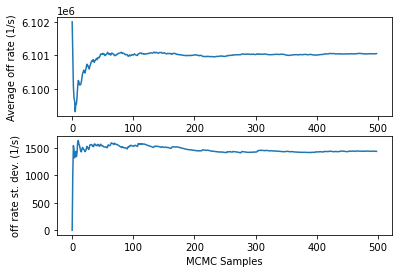

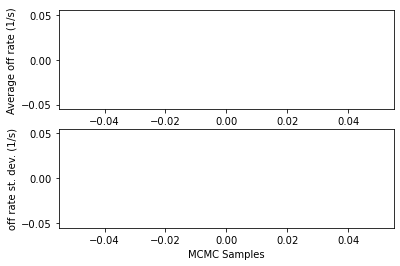

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='MCMC Samples', ylabel='Average off rate (1/s)'>,
 <AxesSubplot:xlabel='MCMC Samples', ylabel='off rate st. dev. (1/s)'>)

In [9]:
seekr.plots.MCMC_conv(running_avg, running_std)
seekr.plots.MCMC_conv(k_on_avg_list, k_on_std_list)


# Milestone Convergence

In [10]:
conv_stride = 500000 #1 ns stride
conv_skip = 5000000 #skip first 10 ns

In [ ]:
bound_dict = [0]
N_conv, R_conv, k_cell_conv, p_equil_conv, k_conv, k_on_conv, conv_intervals = seekr.analyze.check_milestone_convergence(
    model, bound_states, conv_stride, conv_skip, max_steps,)

n_fig, ax = seekr.plots.plot_n_conv(N_conv, conv_intervals)
r_fig = seekr.plots.plot_r_conv(R_conv, conv_intervals)
p_fig, ax = seekr.plots.plot_p_equil(p_equil_conv, conv_intervals)
k_fig, ax = seekr.plots.plot_k_off_conv(k_conv, conv_intervals)

cell_counts {0: {-1: 3551, 1: 2587}}
cell_counts {1: {0: 13826, 2: 327}}
cell_counts {2: {3: 1590, 1: 8214}}
cell_counts {3: {2: 6694, 4: 1742}}
cell_counts {4: {5: 9448, 3: 2033}}
cell_counts {5: {4: 1393, 6: 1901}}
cell_counts {6: {5: 4620, 7: 916}}
cell_counts {0: {-1: 4001, 1: 2709}}
cell_counts {1: {0: 14907, 2: 351}}
cell_counts {2: {3: 1617, 1: 8983}}
cell_counts {3: {2: 7468, 4: 1825}}
cell_counts {4: {5: 10198, 3: 2054}}
cell_counts {5: {4: 1539, 6: 2076}}
cell_counts {6: {5: 5316, 7: 957}}
cell_counts {0: {-1: 4523, 1: 2828}}
cell_counts {1: {0: 15831, 2: 453}}
cell_counts {2: {3: 1646, 1: 10375}}
cell_counts {3: {2: 7900, 4: 2104}}
cell_counts {4: {5: 10845, 3: 2113}}
cell_counts {5: {4: 1744, 6: 2212}}
cell_counts {6: {5: 5690, 7: 1031}}
cell_counts {0: {-1: 4799, 1: 3052}}
cell_counts {1: {0: 16809, 2: 479}}
cell_counts {2: {3: 1693, 1: 11174}}
cell_counts {3: {2: 8529, 4: 2264}}
cell_counts {4: {5: 11597, 3: 2268}}
cell_counts {5: {4: 2114, 6: 2325}}
cell_counts {6: {5: 5

# Determine Minimum Simulation times from RMSD windows

In [ ]:
print(len(conv_intervals))

In [ ]:
window = 30 # 30 ns
cutoff = 0.05 #5%
conv_windows = 20 # 50 ns

In [ ]:

seekr.plots.plot_window_rmsd(N_conv, conv_intervals, window)
seekr.plots.plot_window_rmsd(R_conv, conv_intervals, window)
min_anchor_times = seekr.analyze.calc_RMSD_conv(model, N_conv, R_conv, conv_intervals, window, cutoff, conv_windows)
print(min_anchor_times)

In [ ]:
p_equil, N, R, T, T_tot, Q, n_conv, r_conv, k_cell= seekr.analyze.analyze_kinetics(
     model, bound_states, max_steps = min_anchor_times, verbose=True,)
k_off_list, running_avg, running_std,k_on_list, k_on_avg_list, k_on_std_list = seekr.analyze.monte_carlo_milestoning_error(
    model, bound_states, Q, N, R, p_equil,T_tot, num = 500, skip =100,stride = 100, verbose=False)
#seekr.plots.MCMC_conv(running_avg, running_std)

In [ ]:
MFPT = T[0]
k_off = 1/MFPT
print("MLE k_off", '%.2E' % Decimal(k_off))
k_off_std = np.std(k_off_list)
k_on_std = np.std(k_on_list)
print("k_off entries:", len(k_off_list))
print("avg k off", '%.2E' % Decimal(np.average(k_off_list))," +- ", '%.2E' % Decimal(k_off_std), " s^-1") 
print("avg k on", '%.2E' % Decimal(np.average(k_on_list))," +- ", '%.2E' % Decimal(k_on_std), " M^-1 s^-1")

In [ ]:
window = 30 # 30 ns
cutoff = 0.01 #1%
conv_windows = 20 # 20 ns

In [ ]:
seekr.plots.plot_window_rmsd(N_conv, conv_intervals, window)
seekr.plots.plot_window_rmsd(R_conv, conv_intervals, window)
min_anchor_times = seekr.analyze.calc_RMSD_conv(model, N_conv, R_conv, conv_intervals, window, cutoff, conv_windows)
print(min_anchor_times)

In [ ]:
num = 500
skip = 100
stride = 100

In [ ]:
print()

In [ ]:
p_equil, N, R, T, T_tot, Q, n_conv, r_conv, k_cell= seekr.analyze.analyze_kinetics(
     model, bound_dict, max_steps = min_anchor_times, verbose=True,)
k_off_list, running_avg, running_std,k_on_list, k_on_avg_list, k_on_std_list = seekr.analyze.monte_carlo_milestoning_error(
    model, bound_dict, Q, N, R, p_equil,T_tot, num = num, skip =skip,stride = stride, verbose=False)
#seekr.plots.MCMC_conv(running_avg, running_std)

In [ ]:
MFPT = T[0]
k_off = 1/MFPT
print("MLE k_off", '%.2E' % Decimal(k_off))
k_off_std = np.std(k_off_list)
k_on_std = np.std(k_on_list)
print("k_off entries:", len(k_off_list))
print("avg k off", '%.2E' % Decimal(np.average(k_off_list))," +- ", '%.2E' % Decimal(k_off_std), " s^-1") 
print("avg k on", '%.2E' % Decimal(np.average(k_on_list))," +- ", '%.2E' % Decimal(k_on_std), " M^-1 s^-1")